In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()


from datetime import datetime



tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, name in zip(company_list, company_name):
    company["company_name"] = name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-12,124.019997,126.779999,123.529999,126.570000,126.570000,51338000,AMAZON
2023-06-13,128.119995,128.410004,125.180000,126.660004,126.660004,50564800,AMAZON
2023-06-14,126.699997,126.949997,124.120003,126.419998,126.419998,52422500,AMAZON
2023-06-15,125.209999,127.690002,124.320000,127.110001,127.110001,60458500,AMAZON
2023-06-16,127.709999,127.900002,125.300003,125.489998,125.489998,84188100,AMAZON
2023-06-20,124.970001,127.250000,124.500000,125.779999,125.779999,56930100,AMAZON
2023-06-21,125.639999,126.730003,123.849998,124.830002,124.830002,52137700,AMAZON
2023-06-22,125.309998,130.330002,125.139999,130.149994,130.149994,90354600,AMAZON
2023-06-23,129.110001,130.839996,128.279999,129.330002,129.330002,71855200,AMAZON


In [3]:
# Summary Stats
AAPL.describe()

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()


[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-06-27,NaN,NaN,NaN,NaN
2022-06-28,-0.029790,-0.051404,-0.034736,-0.031749
2022-06-29,0.013024,0.014153,-0.002798,0.014738
2022-06-30,-0.018028,-0.024881,-0.025691,-0.013179
2022-07-01,0.016164,0.031541,-0.002665,0.010707


# The Prediction Model

### Loading the dataset of google stocks

[*********************100%***********************]  1 of 1 completed


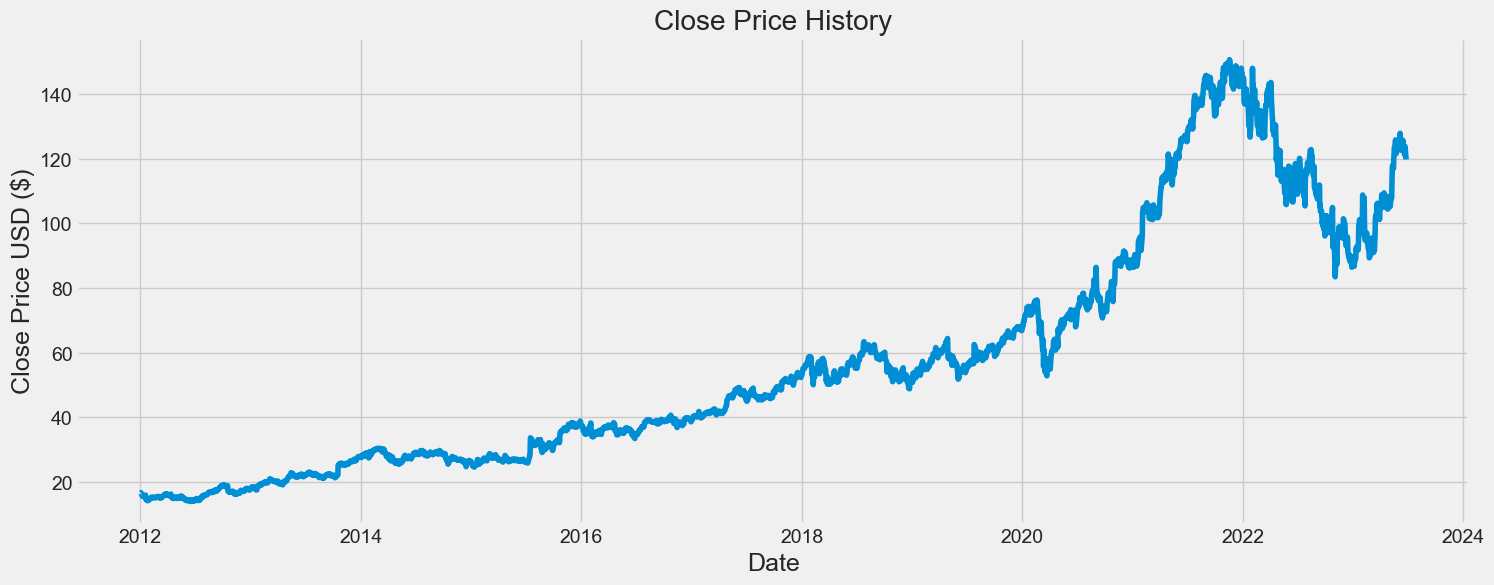

In [4]:
## Prediction

### Getting the dataframe for the stock data

df = pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())

df

### Plotting the closing price for the stock

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Training and scaling the data

In [5]:
### Training data

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .85 ))

training_data_len

### Scaling the data values 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

### Scaled training dataset

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.01936668, 0.01988927, 0.01820133, 0.01656439, 0.01154608,
       0.0116699 , 0.01218339, 0.01285346, 0.01200676, 0.01266045,
       0.01344889, 0.01466158, 0.0049054 , 0.00481982, 0.00398405,
       0.00190098, 0.00164788, 0.00381107, 0.00339409, 0.00383474,
       0.00396584, 0.00474516, 0.00678818, 0.0091116 , 0.00868915,
       0.00924998, 0.00954313, 0.00853256, 0.00967788, 0.00923359,
       0.00846883, 0.00864363, 0.00830131, 0.01000563, 0.00890219,
       0.00856898, 0.00925908, 0.00915165, 0.01080499, 0.01077951,
       0.01153516, 0.01132576, 0.01005116, 0.00835958, 0.00869461,
       0.00875653, 0.00750196, 0.00839417, 0.01069392, 0.01036799,
       0.01130392, 0.01201587, 0.01364372, 0.01355449, 0.01473623,
       0.01584149, 0.01521148, 0.01643874, 0.01601812, 0.01760955])]
[0.01627122404731983]

[array([0.01936668, 0.01988927, 0.01820133, 0.01656439, 0.01154608,
       0.0116699 , 0.01218339, 0.01285346, 0.01200676, 0.01266045,
       0.01344889, 0.01466158, 0.00

### The LSTM Model for closing stock prediction

In [6]:
### Building the LSTM Model

from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2395/2395 [==============================] - 97s 38ms/step - loss: 8.6259e-04


### Testing the model

In [7]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

14/14 [==============================] - 3s 55ms/step


6.380327297441042

### Plotting the graph of training, actual and predicted values

C:\Users\muday\AppData\Local\Temp\ipykernel_16432\3191641161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


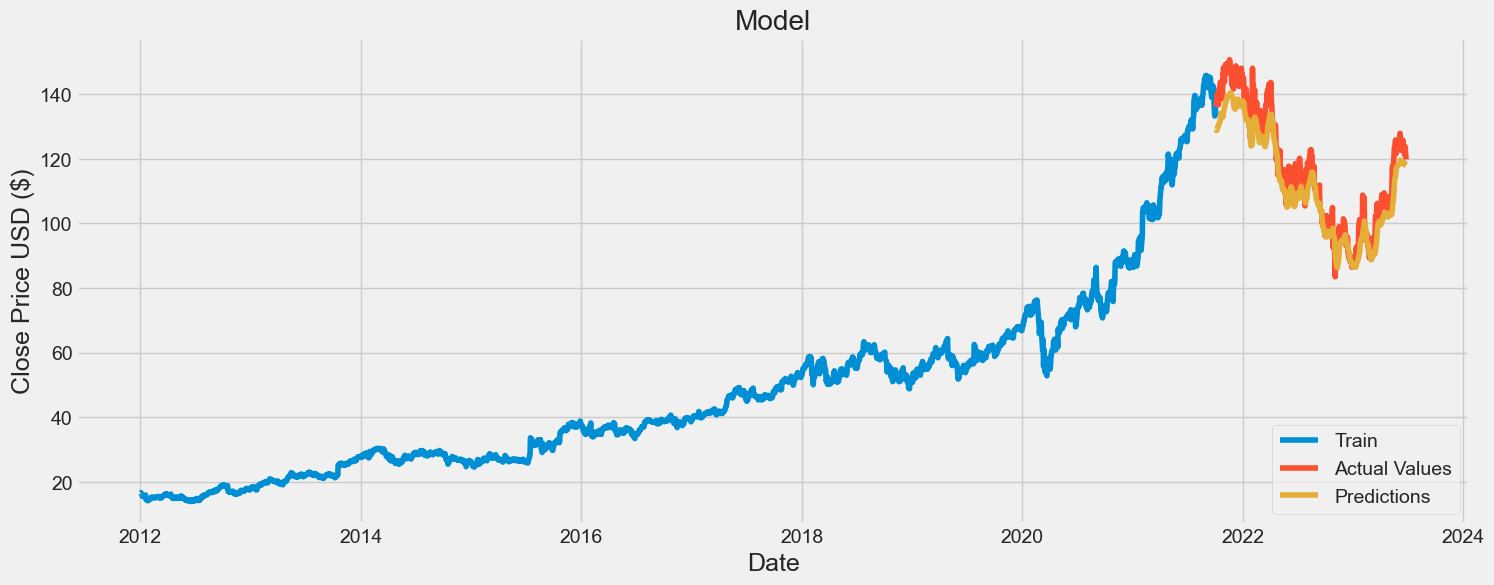

In [8]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual Values', 'Predictions'], loc='lower right')
plt.show()

In [9]:
import pickle

In [10]:
pickle.dump(model,open('Stock_model','wb'))
pickle.dump(scaled_data,open('Scaled_stock','wb'))

In [11]:
pickled_model = pickle.load(open('Stock_model','rb'))
scaled_model = pickle.load(open('Scaled_stock','rb'))

In [12]:
data

,Close
Date,
2012-01-03,16.573130
2012-01-04,16.644611
2012-01-05,16.413727
2012-01-06,16.189817
2012-01-09,15.503389
...,...
2023-06-20,123.849998
2023-06-21,121.260002
2023-06-22,123.870003


In [13]:
training_data_len

2455

In [14]:
predictions = scaler.inverse_transform(predictions.reshape(-1,1)).reshape(-1)

In [15]:
len(predictions)

433

In [16]:
data

,Close
Date,
2012-01-03,16.573130
2012-01-04,16.644611
2012-01-05,16.413727
2012-01-06,16.189817
2012-01-09,15.503389
...,...
2023-06-20,123.849998
2023-06-21,121.260002
2023-06-22,123.870003


In [17]:
scaler.scale_

array([0.00731075])

In [18]:
from sklearn.metrics import accuracy_score

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred))
print("Coefficient of Determination:", r2_score(y_test,y_pred))

ValueError: Found array with dim 3. LinearRegression expected <= 2.